In [1]:
from torch import tensor
from torch import nn
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

In [2]:
# Training data and ground truth
xD = tensor([[1.0], [2.0], [3.0], [4.0]])
yD = tensor([[0.], [0.], [1.], [1.]])

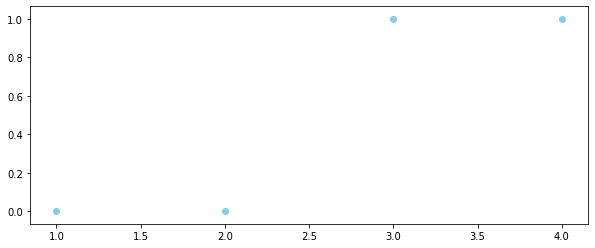

In [3]:
# view data
plt.figure(figsize=(10,4))
plt.scatter(xD.data.numpy(), yD.data.numpy(), color = "skyblue")
plt.show()

In [4]:
class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data.
        """
        y_pred = sigmoid(self.linear(x))
        return y_pred

In [5]:
# our model
model = Model()

criterion = nn.BCELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
epochs = 1000
lossV = []

# Training loop
for epoch in range(epochs):
    
    yP = model(xD)

    # Compute and print loss
    loss = criterion(yP, yD)
    lossV.append(loss.item())
    
    if(epoch % 50 == 0):
        print(f'Epoch {epoch}/1000 | Loss: {loss.item():.4f}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0/1000 | Loss: 0.8433
Epoch 100/1000 | Loss: 0.5953
Epoch 200/1000 | Loss: 0.5688
Epoch 300/1000 | Loss: 0.5480
Epoch 400/1000 | Loss: 0.5286
Epoch 500/1000 | Loss: 0.5105
Epoch 600/1000 | Loss: 0.4936
Epoch 700/1000 | Loss: 0.4778
Epoch 800/1000 | Loss: 0.4630
Epoch 900/1000 | Loss: 0.4492


In [7]:
yP = model(tensor([[1.0]]))
print('value: {:.3f} - class: {}'.format(yP.item(), yP.item() > 0.5))
yP = model(tensor([[7.0]]))
print('value: {:.3f} - class: {}'.format(yP.item(), yP.item() > 0.5))

value: 0.357 - class: False
value: 0.977 - class: True


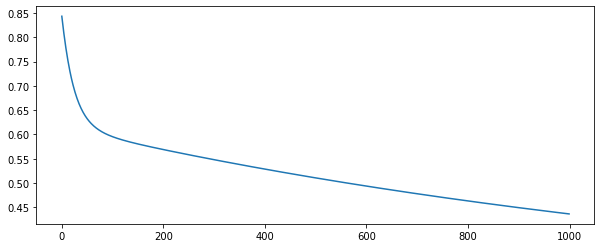

In [8]:
plt.figure(figsize=(10,4))
plt.plot(range(epochs), lossV)
plt.show()